In [136]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

##### Please note: Since PyTorch 0.4.0, Variable was merged with Tensor, and its functionality is now directly available in torch.Tensor

In [137]:
torch.manual_seed(28)

In [138]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],[9.779], [6.182], [7.59], [2.167], [7.042],[10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],[3.366], [2.596], [2.53], [1.221], [2.827],     [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

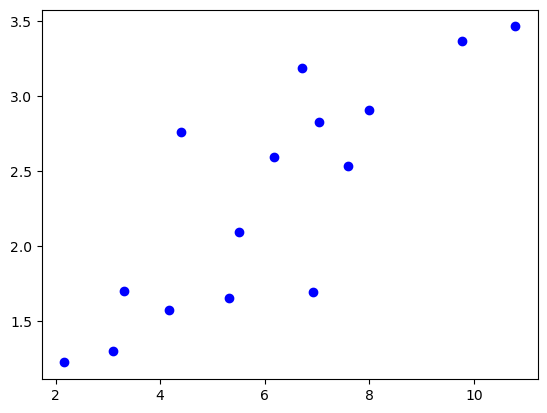

In [139]:
plt.plot(x_train, y_train, 'bo')

In [140]:
w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
# Learning Rate
a = 0.002
# Construct a univariate linear regression model.
def linear_model(x):
    return x * w + b
# Convert the input data to Tensor then to Variable
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = Variable(x_train)
y_train = Variable(y_train)

y = linear_model(x_train)

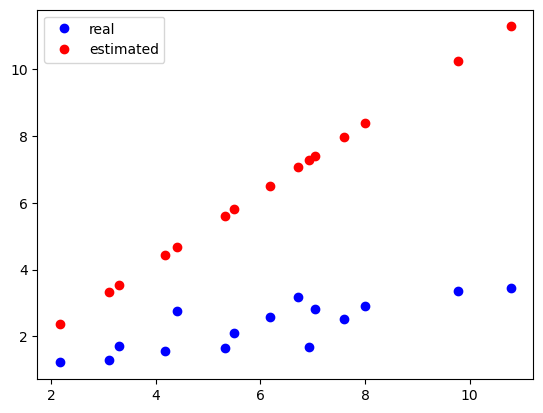

In [141]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')
plt.legend()

In [142]:
def get_loss(y_, y):
    return torch.mean((y_ - y) ** 2)

In [143]:
loss = get_loss(y, y_train)
print(loss)
loss.backward()
print(w.grad)
print(b.grad)


tensor(20.0804, grad_fn=<MeanBackward0>)
tensor([57.9888])
tensor([8.1472])


In [144]:
# One round of params update.
w.data = w.data - a * w.grad.data
b.data = b.data - a * b.grad.data

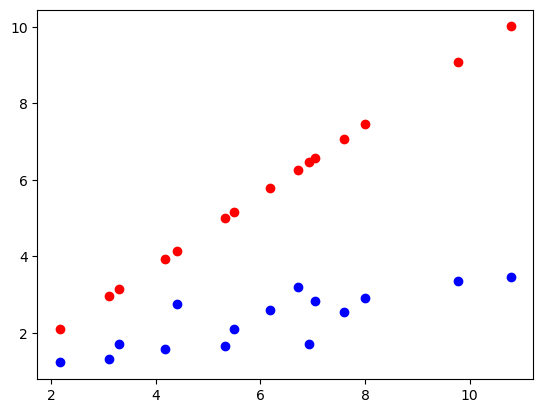

In [145]:
y = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')

In [146]:
for i in range(30):
    y = linear_model(x_train)
    loss = get_loss(y, y_train)

    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    w.data = w.data - a * w.grad.data
    b.data = b.data - a * b.grad.data
    print(f"epoch: {i}, loss: {loss}")

epoch: 0, loss: 13.814743041992188
epoch: 1, loss: 9.527310371398926
epoch: 2, loss: 6.593511581420898
epoch: 3, loss: 4.585972785949707
epoch: 4, loss: 3.2122466564178467
epoch: 5, loss: 2.272221326828003
epoch: 6, loss: 1.6289665699005127
epoch: 7, loss: 1.1887835264205933
epoch: 8, loss: 0.8875569701194763
epoch: 9, loss: 0.6814146637916565
epoch: 10, loss: 0.5403355360031128
epoch: 11, loss: 0.4437776207923889
epoch: 12, loss: 0.3776843845844269
epoch: 13, loss: 0.3324373960494995
epoch: 14, loss: 0.30145493149757385
epoch: 15, loss: 0.28023311495780945
epoch: 16, loss: 0.26569056510925293
epoch: 17, loss: 0.2557182312011719
epoch: 18, loss: 0.24887330830097198
epoch: 19, loss: 0.2441684603691101
epoch: 20, loss: 0.24092791974544525
epoch: 21, loss: 0.23868943750858307
epoch: 22, loss: 0.2371366173028946
epoch: 23, loss: 0.23605303466320038
epoch: 24, loss: 0.23529063165187836
epoch: 25, loss: 0.23474791646003723
epoch: 26, loss: 0.2343555986881256
epoch: 27, loss: 0.23406614363193

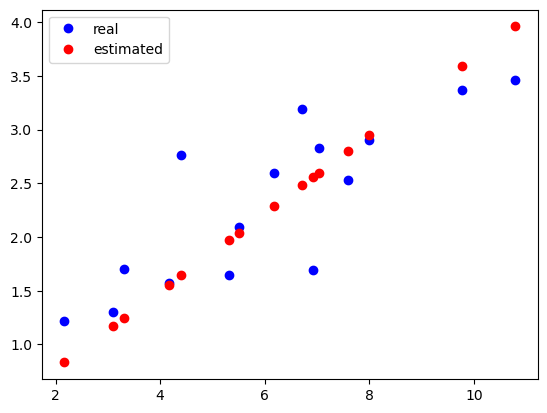

In [147]:
y = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')
plt.legend()

#### How to utilize linear regression with Sklearn

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [149]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [150]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
raw_df = pd.read_csv(data_url, sep='\s+', header=None)
raw_df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",                   "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
raw_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [151]:
# Split the dataset.
data = raw_df.values[:, :13]
target = raw_df.values[:, 13]
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=1)

print(x_train.shape)
print(x_test.shape)

(253, 13)
(253, 13)


In [152]:
# Load the model.
lr = LinearRegression()
# Start training.
lr.fit(x_train, y_train)

print(lr.coef_)
print(lr.intercept_)


[-1.03895378e-01  6.56815411e-02 -9.88784599e-03  1.44988900e+00
 -1.72371494e+01  3.31332604e+00  1.08945012e-02 -1.37553794e+00
  3.23677422e-01 -1.20132483e-02 -8.20440741e-01  8.69013924e-03
 -5.28748376e-01]
36.050645844659186


### Model Evaluation
- Mean Absolute Error, MAE
- Mean Squared Error, MSE
- Root Mean Squared Error, RMSE

In [153]:
from sklearn import metrics # Import the evaluation toolkits of Sklearn.
y_pred = lr.predict(x_test)

MyScore = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", MyScore)

RMSE: 4.779046666296571


In [154]:
print("Default Measurement of Model Performance", lr.score(x_test, y_test))

Default Measurement of Model Performance 0.7397314185094668


#### Visualize the Difference between Real and Estimated Values

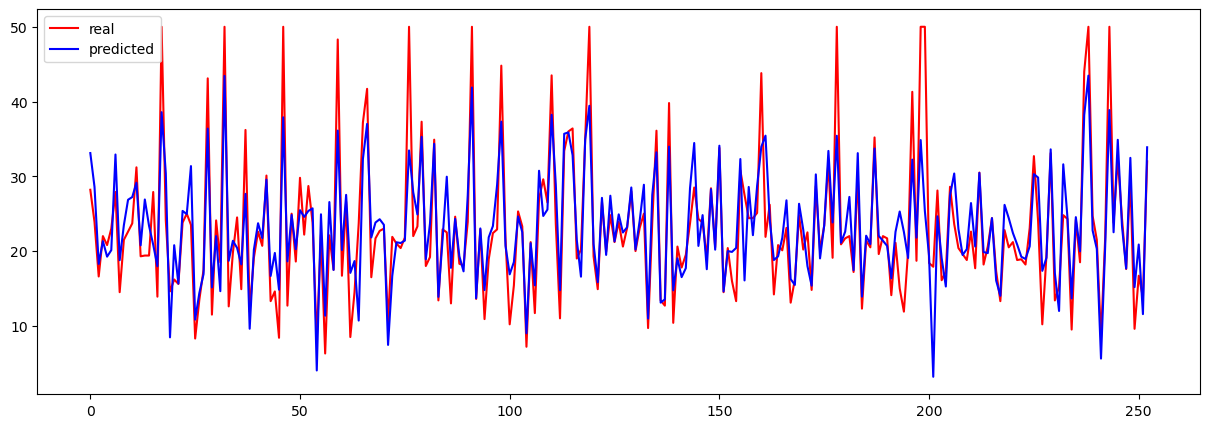

In [155]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, 'r', label='real')
plt.plot(range(len(y_test)), y_pred, 'b', label='predicted')
plt.legend()

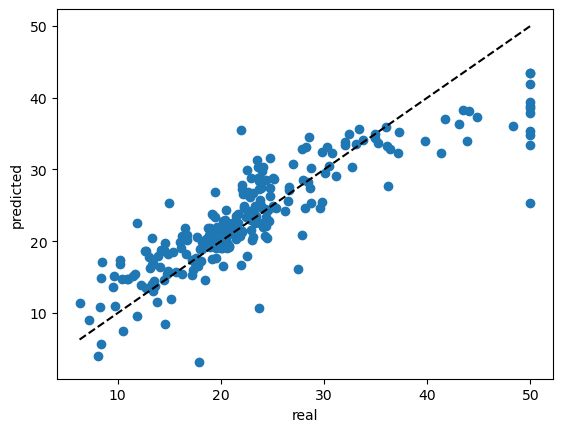

In [156]:
# Visualize the regression curve.
def plot_LR(y_test, y_pred):
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('real')
    plt.ylabel('predicted')
plot_LR(y_test, y_pred)

#### Linear model is sensitive to abnormal values

In [157]:
# Remove the outlier=50.
drop_index = raw_df[raw_df["MEDV"]==50].index.values
raw_df = raw_df.drop(drop_index)
data = raw_df.values[:, :13]
target = raw_df.values[:, 13]
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=12)


In [158]:
# Train the model on training set
lr = LinearRegression()
lr.fit(x_train, y_train)
# Predict the test set data
y_pred = lr.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", RMSE)
print("LinearRegression Score", lr.score(x_test, y_test))

RMSE: 3.9178314317334504
LinearRegression Score 0.7370030268777942


#### SGDRegressor

In [159]:
# Load the model.
lr = SGDRegressor(loss="squared_error", alpha=0.0001)
# Pass the training data to start training.
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE_SGD", RMSE)
print("Score:", lr.score(x_test, y_test))

RMSE_SGD 293149604687082.7
Score: -1.4724409381882263e+27


Really bad performance, right?

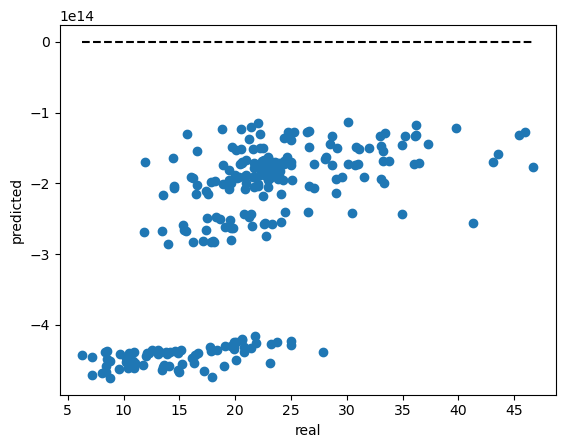

In [160]:
plot_LR(y_test, y_pred)

In [161]:
from sklearn.preprocessing import StandardScaler

ss_x = StandardScaler()
ss_y = StandardScaler()

In [162]:
x_train_s = ss_x.fit_transform(x_train)
x_test_s = ss_x.transform(x_test)

y_train_s = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test_s = ss_y.transform(y_test.reshape(-1,1))

please not that should just use transform() for the test data, otherwise it will cause the data leakage. Which will inflate the performance of your model

- Different Scaling is different world
- Cannot properly add new values

In [163]:
lr = SGDRegressor(loss="squared_error", alpha=0.0001)
lr.fit(x_train_s, y_train_s)

y_pred_s = lr.predict(x_test_s)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_s, y_pred_s))
print("RMSE:", RMSE)
print("SGDRegressor Score:", lr.score(x_test_s, y_test_s))

RMSE: 0.49029883501311633
SGDRegressor Score: 0.7322505136433946


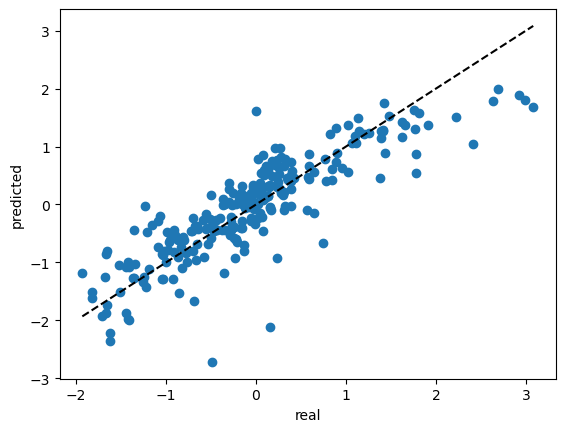

In [164]:
plot_LR(y_test_s, y_pred_s)

### Practice

#### <font color="blue">Q1</font>

In [165]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],[9.779], [6.182], [7.59], [2.167], [7.042],[10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],[3.366], [2.596], [2.53], [1.221], [2.827],     [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [166]:
def linear_model(x):
    return w * x + b

def get_loss(y_pred, label):
    return torch.mean((label - y_pred) ** 2)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = Variable(x_train)
y_train = Variable(y_train)

learning_rates = [0.00002, 0.0002, 0.002, 0.01, 0.02, 0.023]
final_loss = []
for a in learning_rates:
    w = Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.zeros(1), requires_grad = True)
    for i in range(30):
        y = linear_model(x_train)
        loss = get_loss(y_train, y)
        loss.backward()
        w.data = w.data - a * w.grad.data
        b.data = b.data - a * b.grad.data
        w.grad.zero_()
        b.grad.zero_()
    loss = get_loss(y_train, linear_model(x_train))
    print(f"final_loss =", loss.data)
    final_loss.append(loss.item())


final_loss = tensor(5.0481)
final_loss = tensor(7.3632)
final_loss = tensor(0.2544)
final_loss = tensor(0.2428)
final_loss = tensor(0.2554)
final_loss = tensor(103.5388)


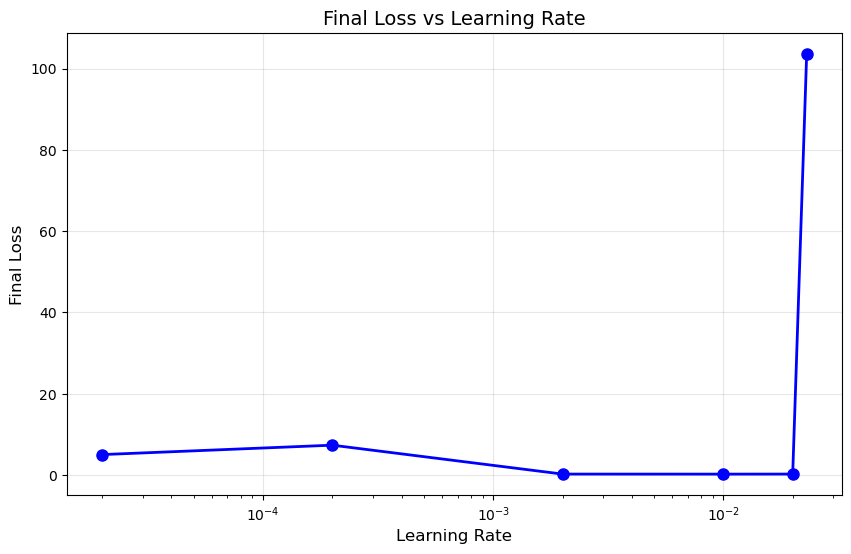

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, final_loss, 'bo-', linewidth=2, markersize=8)
plt.xscale('log')  # Use log scale for learning rates (common practice)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Final Loss', fontsize=12)
plt.title('Final Loss vs Learning Rate', fontsize=14)
plt.grid(True, alpha=0.3)

### Summary of Learning Rate
- Too large
    1. Faster Converge.
    2. May jump over the optimum, but never settle.
    3. May fail to converge.
- Too small
    1. Takes a long time to converge, so it may not reach it with limited number of epochs.
    2. It may get stuck in a suboptimal local minimum.
    3. Potiential Underfitting.

#### <font color="blue">Q2</font>

In [184]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
raw_df = pd.read_csv(data_url, sep='\s+', header=None)
raw_df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS","RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
raw_df.head(5)
data = raw_df.values[:, :13]
target = raw_df.values[:, 13]
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=1)

In [188]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
MyScore1 = metrics.mean_absolute_error(y_test, y_pred)
MyScore2 = metrics.mean_squared_error(y_test, y_pred)
print(MyScore1)
print(MyScore2)


3.33742618560791
22.839317321777344


#### <font color="blue">Q3</font>

Choose the **California Housing Dataset**, which is already normalized.

In [241]:
from sklearn.datasets import fetch_california_housing

In [242]:
california_housing = fetch_california_housing()
print(dir(california_housing))
print("data:")
print(california_housing.data)
print("-----------------------------------------------------------------------")
print("target:")
print(california_housing.target)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
data:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
-----------------------------------------------------------------------
target:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [243]:
# Divide the dataset into training set and test set.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=13)

#### **Least Square Method**

In [244]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)
print("Coefficient:")
print(" ")
print(lr1.coef_)
print("")
print("Interception:", lr1.intercept_)

Coefficient:
 
[-1.58449822e-01  6.01051047e-02 -1.05033268e-02  3.47109096e+00
 -1.20194285e+01  3.57167728e+00  2.53776054e-05 -1.51365901e+00
  3.46633929e-01 -1.38172587e-02 -8.63617067e-01  8.13336167e-03
 -5.68867012e-01]

Interception: 34.78612396196417


The RMSE of Least Square Method = 5.079992777423022


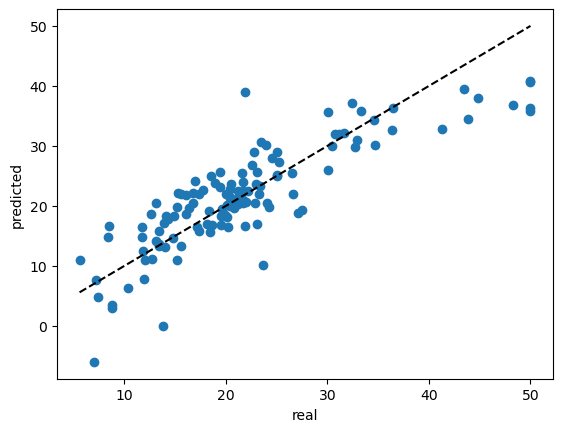

In [245]:
y1_pred = lr1.predict(x_test)
Score1 = np.sqrt(metrics.mean_squared_error(y_test, y1_pred))
print("The RMSE of Least Square Method =", Score1)
plot_LR(y_test, y1_pred)

#### <b>SGD Method</b>

Data Preprocessing

In [249]:
ss_x = StandardScaler()
ss_y = StandardScaler()

x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)
y_train = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test = ss_y.transform(y_test.reshape(-1, 1))

In [250]:
lr2 = SGDRegressor()
lr2.fit(x_train, y_train)
print("Coefficient:")
print(" ")
print(lr2.coef_)
print("")
print("Interception:", lr2.intercept_)

Coefficient:
 
[-0.12775582  0.11901395 -0.0489746   0.10588342 -0.09250453  0.29660669
 -0.00682556 -0.28919061  0.16683807 -0.09212567 -0.18647356  0.07999279
 -0.41924765]

Interception: [0.00093687]


The RMSE of SGDMethod = 0.5623290922570028


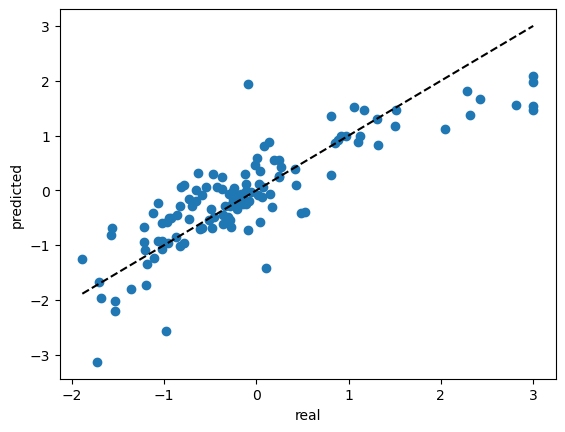

In [251]:
y2_pred = lr2.predict(x_test)
Score2 = np.sqrt(metrics.mean_squared_error(y_test, y2_pred))
print("The RMSE of SGDMethod =", Score2)
plot_LR(y_test, y2_pred)